In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [4]:
def importance_ratios(theta):
    return sp.stats.t.pdf(theta,3)/sp.stats.norm.pdf(theta)

In [5]:
#(a)
theta_cand=np.random.normal(size=100)

In [6]:
IR=importance_ratios(theta_cand)

(array([ 49.,  35.,   2.,   4.,   0.,   3.,   2.,   2.,   2.,   1.]),
 array([-0.15731443, -0.1057323 , -0.05415017, -0.00256804,  0.04901409,
         0.10059622,  0.15217835,  0.20376049,  0.25534262,  0.30692475,
         0.35850688]),
 <a list of 10 Patch objects>)

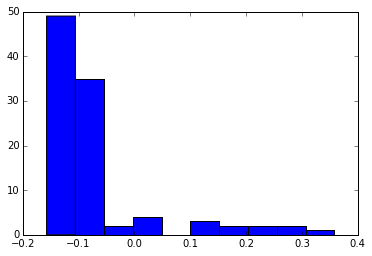

In [7]:
plt.hist(np.log(IR))

In [8]:
#(b)
E_importance_sampling=np.sum(theta_cand*IR)/np.sum(IR)
Var_importance_sampling=np.sum(np.square(theta_cand)*IR)/np.sum(IR)-np.square(E_importance_sampling)

In [9]:
print "simulated E: ",
print E_importance_sampling
print "simulated Var: ",
print Var_importance_sampling

simulated E:  0.110847122653
simulated Var:  1.18520097711


(array([  9.49700000e+03,   2.95000000e+02,   1.18000000e+02,
          4.80000000e+01,   1.50000000e+01,   1.10000000e+01,
          3.00000000e+00,   8.00000000e+00,   4.00000000e+00,
          1.00000000e+00]),
 array([-0.15731446,  0.21824795,  0.59381036,  0.96937277,  1.34493518,
         1.72049759,  2.09605999,  2.4716224 ,  2.84718481,  3.22274722,
         3.59830963]),
 <a list of 10 Patch objects>)

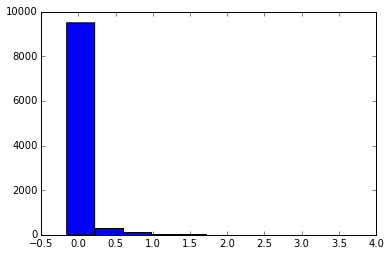

In [14]:
#(c)
theta_cand_c=np.random.normal(size=10000)
IR_c=importance_ratios(theta_cand_c)

plt.hist(np.log(IR_c))

In [11]:
E_importance_sampling_c=np.sum(theta_cand_c*IR_c)/np.sum(IR_c)
Var_importance_sampling_c=np.sum(np.square(theta_cand_c)*IR_c)/np.sum(IR_c)-np.square(E_importance_sampling_c)

print "simulated E: ",
print E_importance_sampling_c
print "simulated Var: ",
print Var_importance_sampling_c

simulated E:  0.00917100098034
simulated Var:  1.54452892837


In [12]:
#(d)
def normalized_weight(theta):
    S=len(theta)
    return importance_ratios(theta)*S/np.sum(importance_ratios(theta))
    
def S_eff(theta):
    return 1./np.sum(np.square(normalized_weight(theta)))

In [13]:
print S_eff(theta_cand_c)

6.50862297522e-05
